In [83]:
import pandas as pd
import numpy as np
import librosa 
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os
import csv
import soundfile
import sklearn
from matplotlib.colors import Normalize
import glob

## Extracting features

In [101]:
path = os.chdir('C:/Users/makye/OneDrive/Documents/Career/BeCode/study/Data_preprocessing/audioProcessing/-6_dB_pump')
print(os.getcwd())

#Abnormal
wave , sr = librosa.load('pump/id_00/abnormal/00000000.wav')

#Normal
wave , sr = librosa.load('pump/id_00/normal/00000000.wav')


C:\Users\makye\OneDrive\Documents\Career\BeCode\study\Data_preprocessing\audioProcessing\-6_dB_pump


In [103]:
#Individual functions for targeted features

#Chromagram 
def feature_chromagram(wave, sr):
    
    stft_spectrogram=np.abs(librosa.stft(wave))
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sr).T,axis=0)
    return chromagram


#Melspectrogram
def feature_melspectrogram(wave, sr):
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=abnormal, sr=sr, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

#MFCC
def feature_mfcc(wave, sr):
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=abnormal, sr=sr, n_mfcc=40).T, axis=0)
    

In [102]:
# wrapping feature extraction functions so we only have to load each audio file once


def get_features(file):
    
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        wave = audio.read(dtype="float32")
        sample_rate = audio.samplerate
       
        # compute features of soundfile
        chromagram = feature_chromagram(wave, sample_rate)
        melspectrogram = feature_melspectrogram(wave, sample_rate)
        mfc_coefficients = feature_mfcc(wave, sample_rate)

        feature_matrix=np.array([])
        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))
        
        return feature_matrix


In [93]:
#load our entire dataset and compute the features of each audio file

def load_data():
    
    X,y=[],[]
    
    count = 0
    holder = ['normal', 'abnormal']
    for i in holder:
        v = f'pump/id_*/{i}/*.wav'
        if i == 'normal':
            target = 0
        else:
            target = 1
            
    
        for file in glob.glob(v):
            file_name=os.path.basename(file)
            features = get_features(file)
            X.append(features)
            y.append(target)
            count += 1
            
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{4205} audio samples',end=' ')
        
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)


In [94]:
features, target = load_data()

 Processed 4205/1440 audio samples 

In [95]:
# Extracted features (data frame)

print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) 
features_df


Audio samples represented: 4205
Numerical features extracted per sample: 141


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,0.827467,0.8479,0.873035,0.876438,0.853773,0.848149,0.878025,0.811812,0.822269,0.851662,...,0.000303,0.000434,0.000799,0.000536,0.000315,0.000213,0.000157,0.000058,0.000006,None
1,0.688799,0.755214,0.958208,0.771547,0.786435,0.783518,0.749555,0.71233,0.767979,0.827285,...,0.000066,0.000057,0.000056,0.000061,0.000059,0.000053,0.000033,0.000008,0.0,None
2,0.782649,0.849841,0.869558,0.812481,0.786022,0.796112,0.764843,0.828255,0.842458,0.807846,...,0.000076,0.000066,0.000058,0.000057,0.000052,0.000044,0.000028,0.000007,0.0,None
3,0.472201,0.57714,0.66879,0.659203,0.639624,0.596045,0.988213,0.732481,0.519813,0.53055,...,0.000207,0.000175,0.000139,0.000114,0.000128,0.000137,0.000092,0.00002,0.000001,None
4,0.533751,0.975324,0.790232,0.498157,0.542732,0.787725,0.534632,0.468923,0.502337,0.546803,...,0.000138,0.000126,0.000112,0.000092,0.000097,0.000097,0.000065,0.000016,0.000001,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,0.608594,0.586619,0.602368,0.575185,0.620158,0.585028,0.758421,0.960043,0.827801,0.659254,...,0.000329,0.000266,0.000253,0.000392,0.000427,0.000346,0.000184,0.000042,0.000003,None
4201,0.581807,0.595742,0.664435,0.604573,0.627442,0.626919,0.712487,0.689808,0.804024,0.699978,...,0.000328,0.000316,0.000341,0.000418,0.000571,0.000558,0.000265,0.000052,0.000003,None
4202,0.668432,0.695663,0.691323,0.660255,0.726915,0.724771,0.835097,0.780518,0.915734,0.803679,...,0.00024,0.000261,0.000307,0.000397,0.00047,0.000367,0.000189,0.000036,0.000002,None
4203,0.735016,0.749819,0.703061,0.695974,0.752524,0.717106,0.798916,0.78699,0.904429,0.793422,...,0.000206,0.000208,0.000222,0.000281,0.000298,0.000275,0.000144,0.00003,0.000002,None


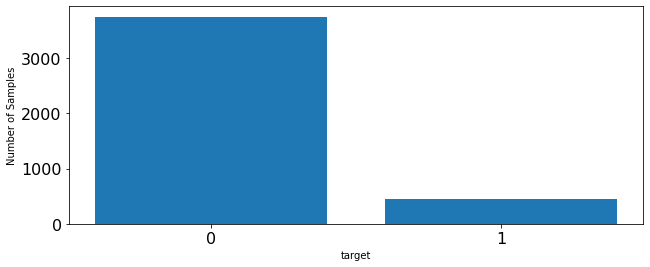

In [98]:
#Imbalances in the target dataset

# plot target
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)

#np.unique returns ordered list of unique elements and count of each element
target_list, count = np.unique(target, return_counts=True)
plt.bar(x=range(2), height=count)
plt.xticks(ticks=range(2), labels = [target for target in target_list],fontsize=10)
plt.xlabel('target')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

In [104]:
#CSV dataFrame

def createCsv(df):
    

    df.to_csv('pump/-6dbpump_features_martin.csv', index=False)
    
createCsv(features_df)

In [ ]:
#Features to Extract!! (Never mind these, will use it for fan or valve data)

spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
Constant Q-transform (CQT)
